In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy import stats

In [67]:
d = [4.00,1.00]
h = [30.00,25.00,20.00]
t_4_30 = [8.33,8.17,8.34]
t_4_25 = [7.07,7.09,7.01]
t_4_20 = [5.90,5.88,5.78]
t_1_30 = [22.06,23.58,22.53]
t_1_25 = [18.63,18.93,20.34]
t_1_20 = [17.17,17.73,17.08]

In [68]:
def incertidumbre(t):
    def incer_t(t):
        t_i = [(t[i] - np.mean(t))**2 for i in range(len(t))]
        return np.sum(t_i)
    return np.sqrt(incer_t(t)/len(t))

In [69]:
t_4_avg = [np.mean(t_4_30),np.mean(t_4_25),np.mean(t_4_20)]
t_1_avg = [np.mean(t_1_30),np.mean(t_1_25),np.mean(t_1_20)]
incer_t_4 = [incertidumbre(t_4_30),incertidumbre(t_4_25),incertidumbre(t_4_20)]
incer_t_1 = [incertidumbre(t_1_30),incertidumbre(t_1_25),incertidumbre(t_1_20)]

tabla_avg = pd.DataFrame({'h':h,'t_4_avg':t_4_avg,'incer_t_4': incer_t_4 ,'t_1_avg':t_1_avg, 'incer_t_1':incer_t_1})
tabla_avg

,h,t_4_avg,incer_t_4,t_1_avg,incer_t_1
0,30.0,8.280000,0.077889,22.723333,0.635418
1,25.0,7.056667,0.033993,19.300000,0.745520
2,20.0,5.853333,0.052493,17.326667,0.287557


In [70]:
def cH(t,d):
    return t*(d**2)

def inceritdumbre_cH(t,d,s1,s2):
    def incer_d(d,t):
        return 2*t*d
    def incer_t(d):
        return d**2
    return np.sqrt((incer_d(d,t)*s1)**2 + (incer_t(d)*s2)**2)


In [71]:
cH_4 = [cH(t_4_avg[i],d[0]) for i in range(len(t_4_avg))]
cH_1 = [cH(t_1_avg[i],d[1]) for i in range(len(t_1_avg))]
incer_cH_4 = [inceritdumbre_cH(t_4_avg[i],d[0],0.02,0.01) for i in range(len(t_4_avg))]
incer_cH_1 = [inceritdumbre_cH(t_1_avg[i],d[1],0.02,0.01) for i in range(len(t_1_avg))]

tabla_cH = pd.DataFrame({'h':h,'cH_4':cH_4,'incer_cH_4':incer_cH_4,'cH_1':cH_1,'incer_cH_1':incer_cH_1})
tabla_cH

,h,cH_4,incer_cH_4,cH_1,incer_cH_1
0,30.0,132.480000,1.334427,22.723333,0.908988
1,25.0,112.906667,1.140347,19.300000,0.772065
2,20.0,93.653333,0.950102,17.326667,0.693139


In [72]:
def regresion_1(t,gamma):
  slope, intercept, r, p, std_err = stats.linregress(t,gamma)
  def myfunc(x):
    return slope * x + intercept
  
  mymodel = list(map(myfunc, t))
  
  r_squared = r**2
  
  print('slope:', slope)
  print('intercept:', intercept)
  print('r:', r)
  print('R^2:', r_squared)
  print('p:', p)
  print('std_err:', std_err)
  return mymodel

In [73]:
reg_cH_4 = regresion_1(h,cH_4)
reg_cH_1 = regresion_1(h,cH_1)

slope: 3.8826666666666645
intercept: 15.94666666666673
r: 0.9999886790957614
R^2: 0.9999773583196857
p: 0.003029256782292355
std_err: 0.018475208613956386
slope: 0.5396666666666665
intercept: 6.291666666666671
r: 0.9881810024442741
R^2: 0.9765016935917704
p: 0.09797473914987373
std_err: 0.08371578903249607


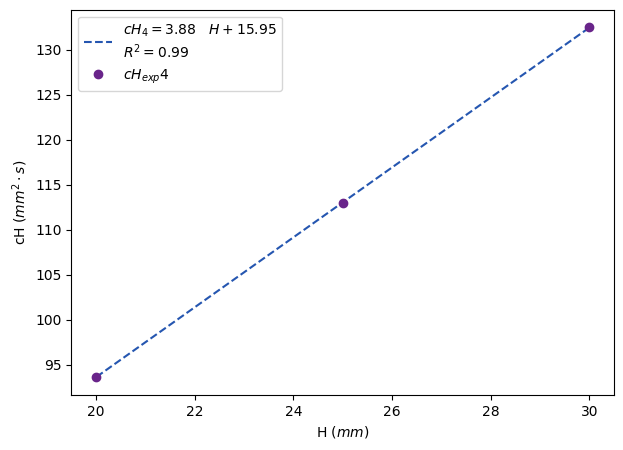

In [74]:
fig = plt.figure(figsize=(7,5))
plt.plot(h,reg_cH_4, linestyle='--',color='#2556b0',label=r'$cH_{4} = 3.88\quad H + 15.95$' + '\n' + r'$R^2 = 0.99$')
plt.plot(h,cH_4,'o',label=r'$cH_{exp} 4$',color='#69248a')
plt.xlabel(r'H ($mm$)')
plt.ylabel(r'cH ($mm^2 \cdot s$)')
plt.legend()
plt.savefig('cH_4.png')
plt.show()

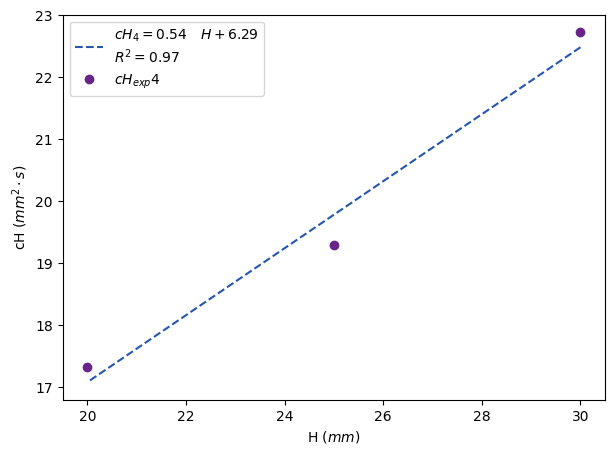

In [75]:
fig_2 = plt.figure(figsize=(7,5))
plt.plot(h,reg_cH_1,linestyle='--',color='#2556b0',label=r'$cH_{4} = 0.54\quad H + 6.29$' + '\n' + r'$R^2 = 0.97$')
plt.plot(h,cH_1,'o',label=r'$cH_{exp} 4$',color='#69248a')
plt.xlabel(r'H ($mm$)')
plt.ylabel(r'cH ($mm^2\cdot s$)')
plt.legend()
plt.savefig('cH_1.png')
plt.show()